In [1]:
import sys
sys.path.insert(0,'C:\\Users\\student\\OneDrive\\Desktop\\cbs\\Third Semester\\Python for the financial economist\\python_for_the_financial_economist-master\\')


In [4]:
#All libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import numpy as np
import pickle
from sklearn.inspection import permutation_importance
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file_path = r"C:\Users\joseo\OneDrive\Desktop\cbs\Fourth Semester\train_output_dt_2304.xlsx"
file_path_1 = r"C:\Users\joseo\OneDrive\Desktop\cbs\Fourth Semester\test_output_dt_2304.xlsx"

train_output = pd.read_excel(file_path)
test_output = pd.read_excel(file_path_1)

train_output.head()


,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,...,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
0,2001,1,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831451,1.514101,0.593348,0.868780,-3.101556,0.225085,NaN,NaN,NaN,-0.047737
1,2001,2,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.488878,0.104165,0.403347,0.039194
2,2001,3,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.371535,0.031436,0.403347,0.048317
3,2001,4,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.374019,-0.057692,0.403347,-0.120083
4,2001,5,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.331596,-0.087932,0.403347,0.009734


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_output.tail()
train_output.describe().loc[["mean", "min", "max"]]

,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,mve,log_bm,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
mean,2005.600579,6.383174,72477.708308,-6.971210e-19,2.367843e-17,-7.063334e-19,-3.621257e-18,7.988363e-18,1.117080e-17,1.752645e-17,-5.149649e-16,8.257324e-18,2.792436e-16,-9.222973e-17,-8.370972e-18,-5.838426e-18,6.392042e-18,4.053633e-18,-4.087842e-16,6.001150e-18,-2.457442e-17,0.007015
min,2001.000000,1.000000,10001.000000,-2.100251e+00,-1.874527e+00,-5.723537e+00,-6.544472e+00,-3.907840e+00,-1.118155e+00,-3.663731e+00,-2.670606e+00,-4.856497e+00,-1.278604e+00,-7.796565e-01,-2.547114e+00,-6.351607e+00,-9.112829e+00,-4.969379e+01,-2.836409e+00,-1.635123e+00,-8.943866e+00,-0.803269
max,2012.000000,13.000000,93435.000000,2.004507e+01,2.220918e+02,7.711658e+00,2.555585e+01,6.595904e+00,1.254134e+01,8.031193e+00,3.187367e+00,1.226257e+00,1.243065e+00,1.940369e+00,2.930897e+00,2.054511e+00,1.214780e+01,1.048700e+00,4.268911e+00,1.163693e+01,6.302074e+00,1.397341


In [6]:
test_output.tail()
test_output.describe().loc[["mean", "min", "max"]]

,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,mve,log_bm,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
mean,2015.625181,6.309168,56524.552637,0.006910,-0.011074,-0.056982,0.044842,0.022748,0.104872,-0.024124,0.288589,-0.191230,-0.192608,-0.024418,0.022083,-0.351432,0.005855,-0.369230,-0.036259,-0.150828,-0.143281,-0.012846
min,2013.000000,1.000000,10001.000000,-2.087372,-2.254422,-5.744684,-0.685249,-4.183837,-1.117149,-4.071561,-2.407973,-4.856497,-1.278604,-0.779657,-2.421188,-6.351607,-25.562462,-19.036660,-2.801092,-1.662260,-20.599738,-0.975885
max,2021.000000,13.000000,93433.000000,12.413125,16.607876,5.086522,13.530257,5.477299,36.722823,18.621227,2.894428,1.110359,1.207538,2.118526,2.266859,2.027885,6.478956,2.442389,3.542536,15.804921,30.759728,1.971323


In [44]:
# Define predictors and target for training and testing datasets
X_train = train_output.drop(columns=['excess_return', 'year', 'permno', 'month'])
y_train = train_output['excess_return']

X_test = test_output.drop(columns=['excess_return', 'year', 'permno', 'month'])
y_test = test_output['excess_return']


# Investigating variable relevance

Text(0.5, 1.0, 'Excess Return Distribution')

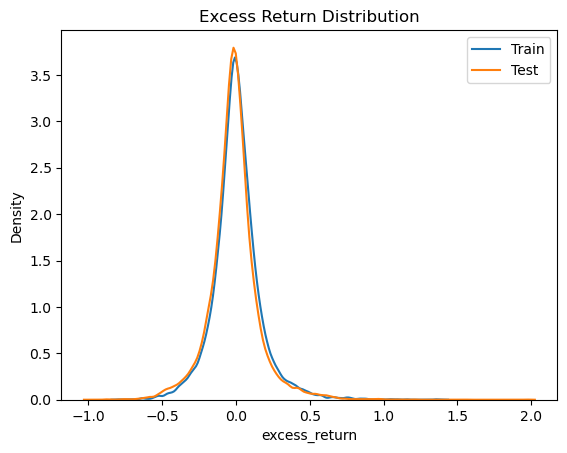

In [11]:
sns.kdeplot(y_train, label='Train'); sns.kdeplot(y_test, label='Test'); plt.legend(); plt.title("Excess Return Distribution")


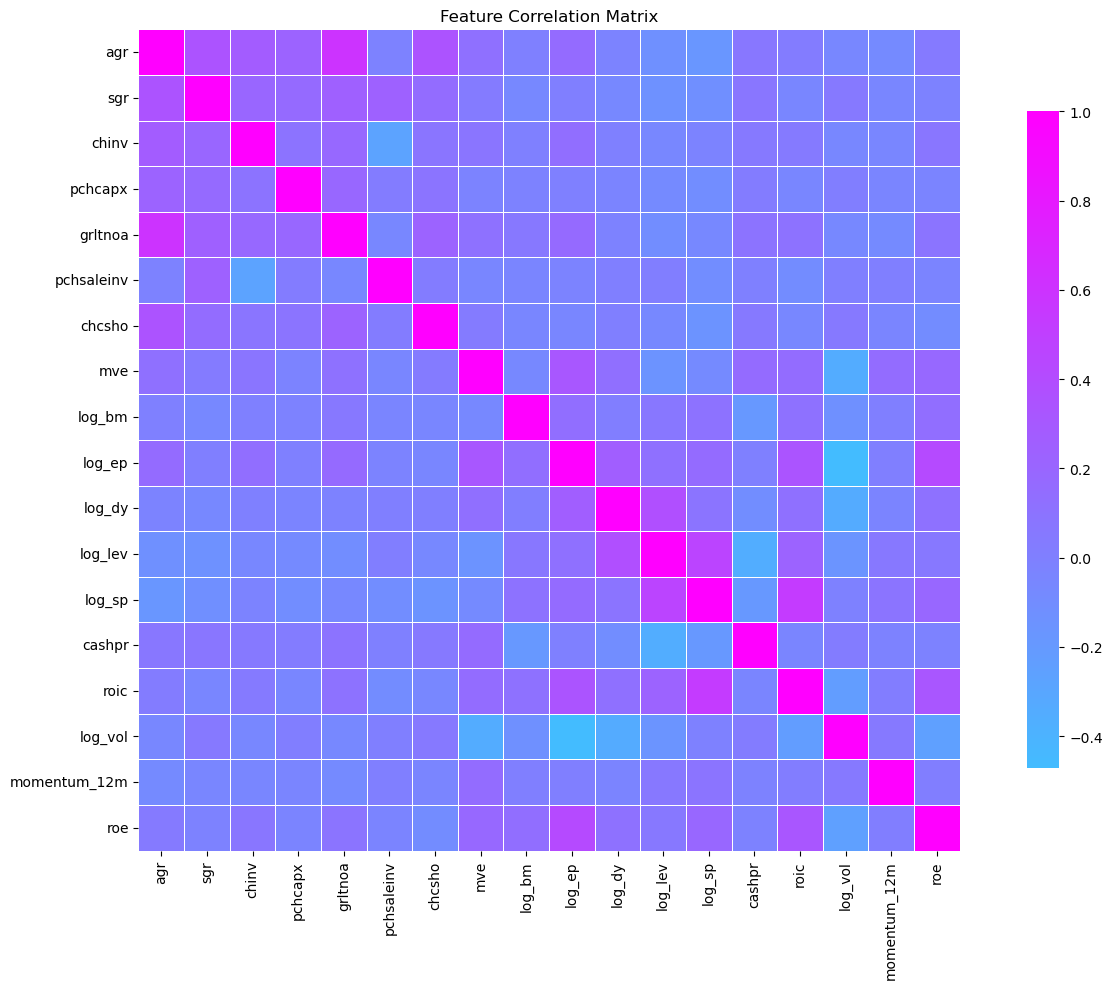

In [12]:
corr_matrix = X_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='cool', center=0, annot=False, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [13]:
threshold = 0.85
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(col, row) for col in upper.columns for row in upper.index if abs(upper.loc[row, col]) > threshold]

print("Highly correlated pairs (|r| > 0.85):")
for pair in high_corr:
    print(pair[0], "<-->", pair[1], " | Corr:", corr_matrix.loc[pair[0], pair[1]].round(2))


Highly correlated pairs (|r| > 0.85):


# Now all predictors have been proven to be relevant

# First model: LASSO regression

In [45]:
# pipeline
lasso_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lasso_cv', LassoCV(cv=5, random_state=123, alphas=np.logspace(-4, 1, 50)))
])

# Fit the pipeline
lasso_pipeline.fit(X_train, y_train)

# Get best alpha and trained Lasso model
best_alpha = lasso_pipeline.named_steps['lasso_cv'].alpha_
print(f"Best alpha: {best_alpha:.5f}")

Best alpha: 0.00020


In [46]:
# Predict
y_pred = lasso_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# Extract coefficients
lasso_model = lasso_pipeline.named_steps['lasso_cv']
coef = lasso_model.coef_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})
feature_importance_df = feature_importance_df[feature_importance_df['Coefficient'] != 0]
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)


Test RMSE: 0.1717
Test R²: -0.0102


C:\Users\joseo\AppData\Local\Temp\ipykernel_7068\3213292208.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='Blues_r')


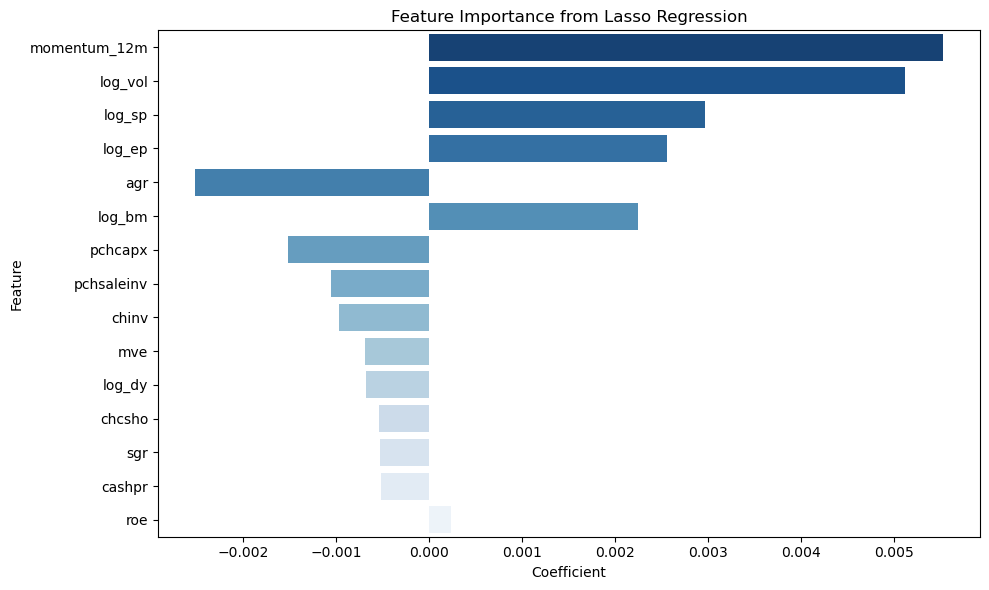

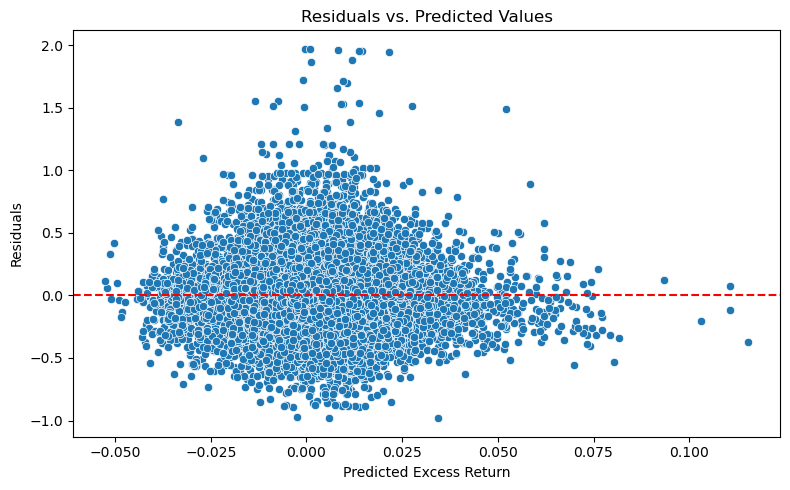

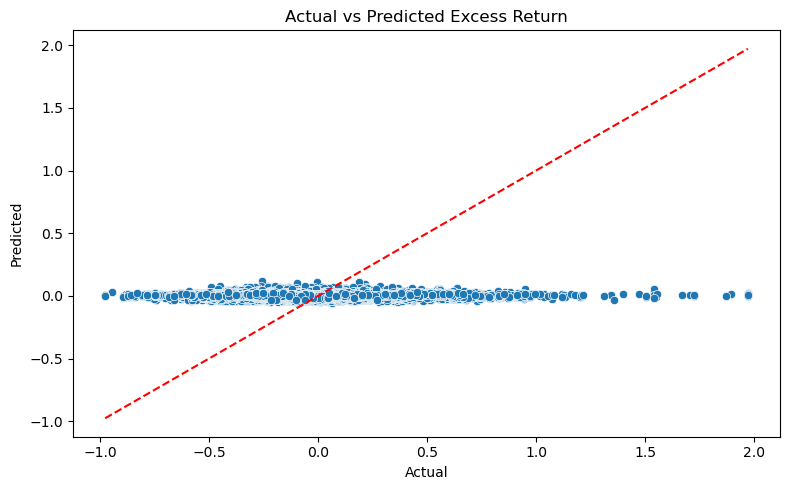

In [47]:
# Feature importance (non-zero coefficients)
coef = lasso_model.coef_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})
feature_importance_df = feature_importance_df[feature_importance_df['Coefficient'] != 0]
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from Lasso Regression")
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Excess Return")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Excess Return")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

In [48]:
# Store everything in a dictionary
lasso_results = {
    'model_name': 'LassoCV Pipeline',
    'model_object': lasso_pipeline,
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred, name='Lasso_Pred'),
    'rmse': rmse,
    'r2': r2,
    'feature_importance': feature_importance_df
}

joblib.dump(lasso_results, 'Lasso_Model_Results.pkl')

print("✅ Lasso model results saved to 'Lasso_Model_Results.pkl'")


✅ Lasso model results saved to 'Lasso_Model_Results.pkl'


# Second model: Random Forests

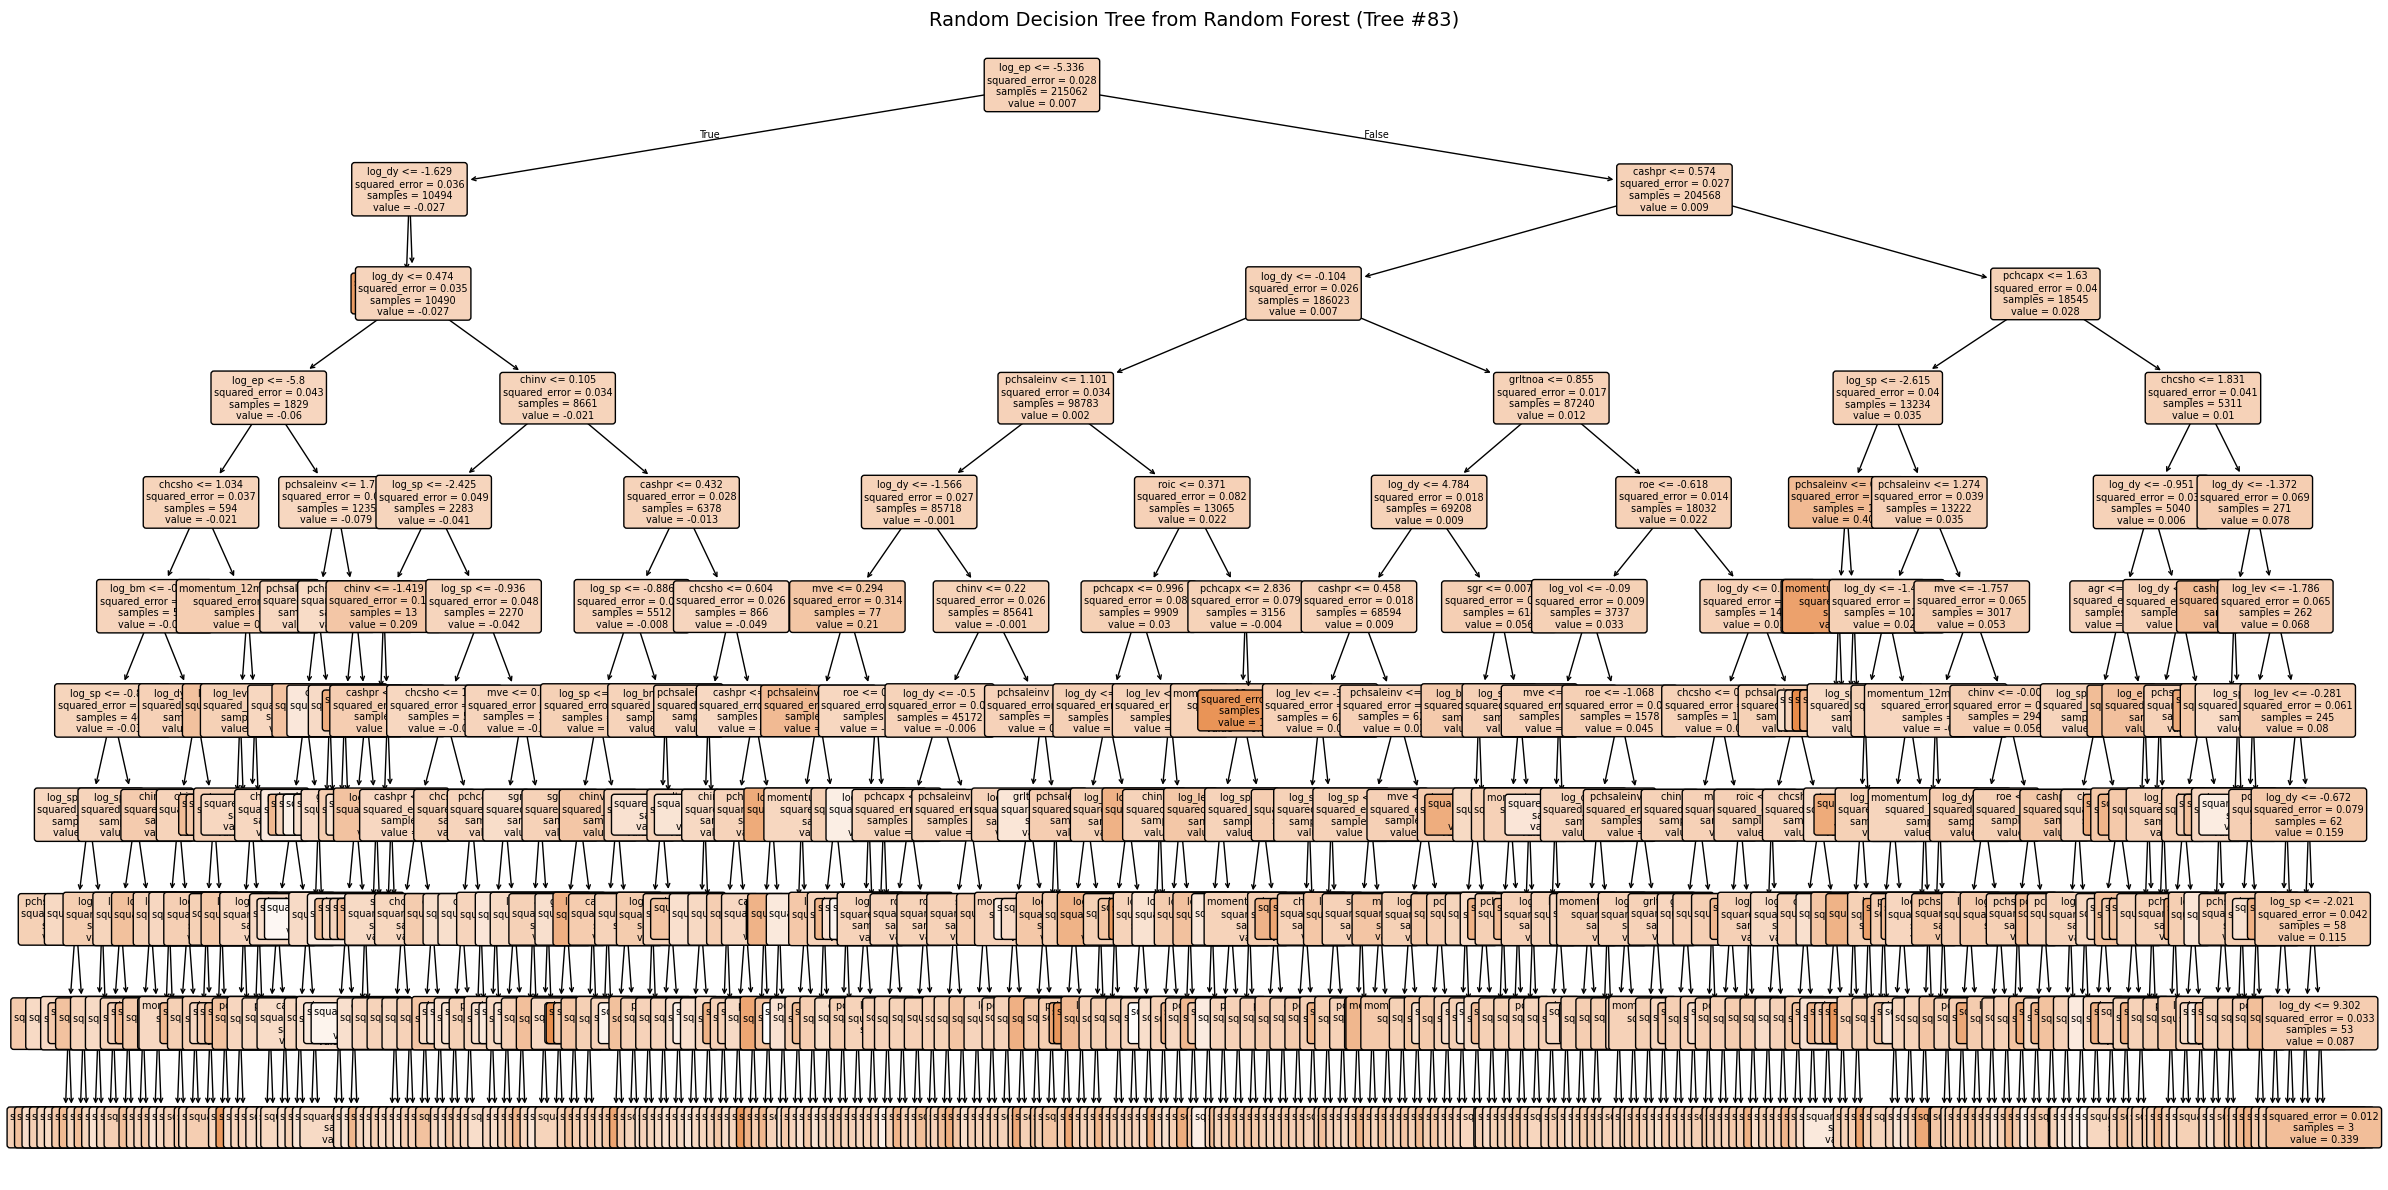

<Figure size 640x480 with 0 Axes>

In [12]:
#visualizing a random sample tree
rf_results = joblib.load("RandomForest_Model_Results.pkl")
RFmodel = rf_results['model_object']

random_tree_index = random.randint(0, len(RFmodel.estimators_) - 1)
estimator = RFmodel.estimators_[random_tree_index]

plt.figure(figsize=(24, 12))  # Wide enough to fit horizontally
plot_tree(
    estimator,
    feature_names=rf_results['feature_importance']['Feature'].tolist(),
    class_names=["Class 0", "Class 1"],
    filled=True,
    rounded=True,
    max_depth=10,      
    fontsize=7        
)
plt.title(f"Random Decision Tree from Random Forest (Tree #{random_tree_index})", fontsize=14)
plt.tight_layout()
plt.savefig("RandomForest_Tree_Depth10.png", dpi=300, bbox_inches='tight')  
plt.show()

plt.savefig("tree_visualization_10.pdf", format="pdf", bbox_inches='tight')



Test RMSE: 0.1720
Test R²: -0.0147


C:\Users\joseo\AppData\Local\Temp\ipykernel_7068\3060340652.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


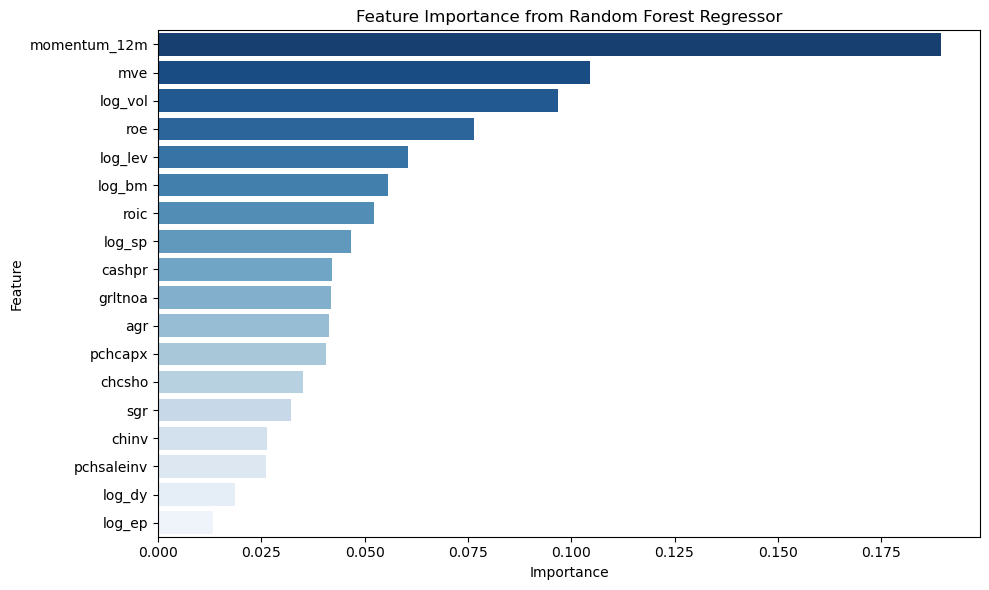

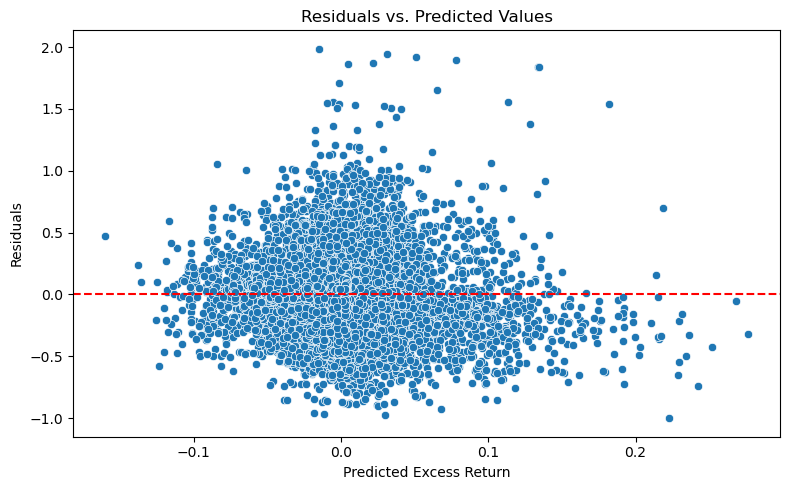

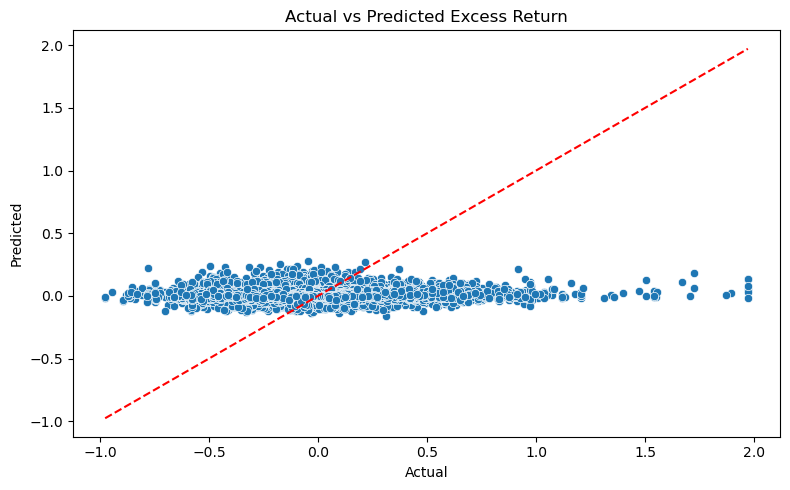

In [51]:
# Fit the tuned Random Forest Regressor
RFmodel = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)
RFmodel.fit(X_train, y_train)

# Predict on test set
y_pred = RFmodel.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# Feature importance
importances = RFmodel.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from Random Forest Regressor")
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Excess Return")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Excess Return")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()


In [52]:
rf_results = {
    'model_name': 'Random Forest Regressor',
    'model_object': RFmodel,
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred, name='RF_Pred'),
    'rmse': rmse,
    'r2': r2,
    'feature_importance': feature_importance_df
}

joblib.dump(rf_results, 'RandomForest_Model_Results.pkl')

print("✅ Random Forest model results saved to 'RandomForest_Model_Results.pkl'")


✅ Random Forest model results saved to 'RandomForest_Model_Results.pkl'


# Third model: Interaction terms

In [53]:
##ADDING INTERACTION TERMS

# ---- Add interaction and squared terms ---- #
def add_interactions(df):
    df = df.copy()
    df['momentum_12m_x_mve'] = df['momentum_12m'] * df['mve']
    df['momentum_12m_x_log_vol'] = df['momentum_12m'] * df['log_vol']
    df['momentum_12m_x_roe'] = df['momentum_12m'] * df['roe']
    df['mve_x_log_vol'] = df['mve'] * df['log_vol']
    df['mve_x_roe'] = df['mve'] * df['roe']
    df['log_vol_x_roe'] = df['log_vol'] * df['roe']
    df['log_lev_x_log_bm'] = df['log_lev'] * df['log_bm']
    df['roic_x_mve'] = df['roic'] * df['mve']
    df['roic_x_momentum_12m'] = df['roic'] * df['momentum_12m']

    # Squared terms
    df['momentum_12m_sq'] = df['momentum_12m'] ** 2
    df['mve_sq'] = df['mve'] ** 2
    df['log_vol_sq'] = df['log_vol'] ** 2
    df['roe_sq'] = df['roe'] ** 2
    df['log_lev_sq'] = df['log_lev'] ** 2
    return df

X_train_enhanced = add_interactions(X_train)
X_test_enhanced = add_interactions(X_test)

Test RMSE: 0.1722
Test R²: -0.0166


C:\Users\joseo\AppData\Local\Temp\ipykernel_7068\81112377.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


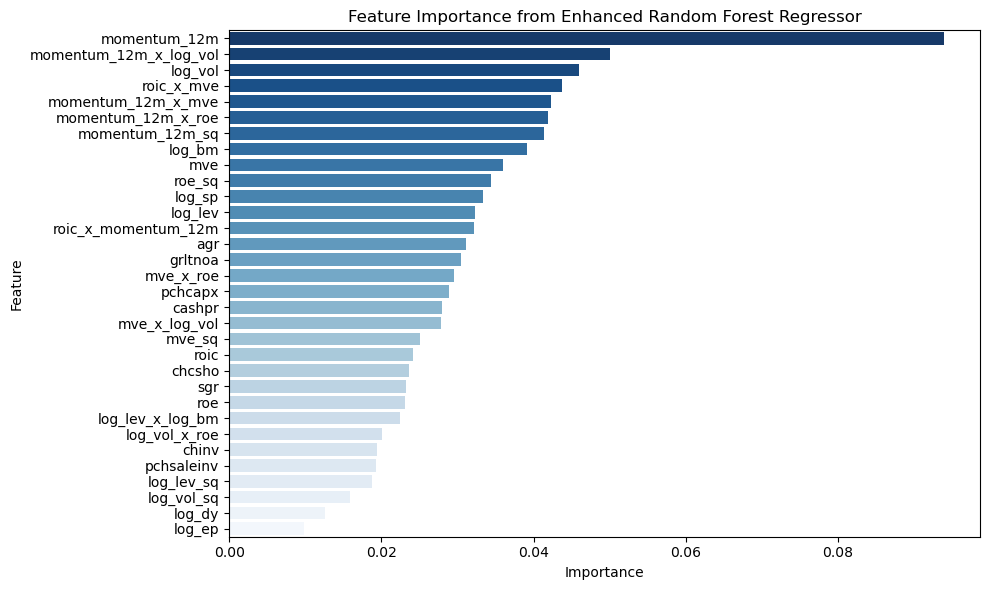

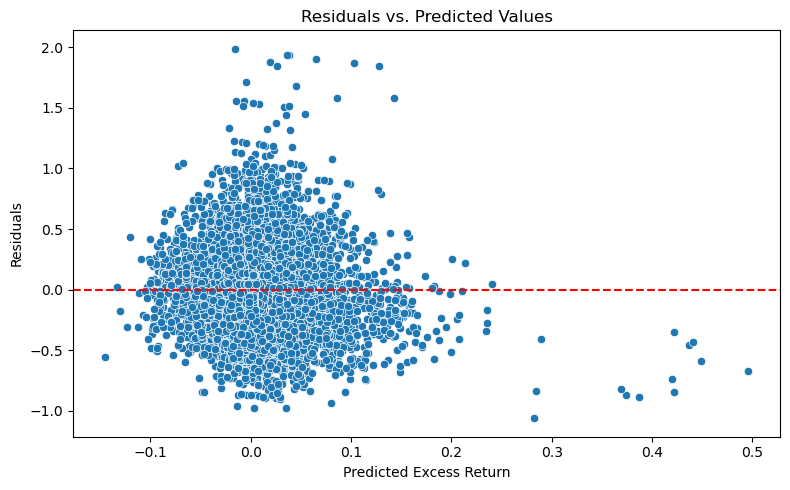

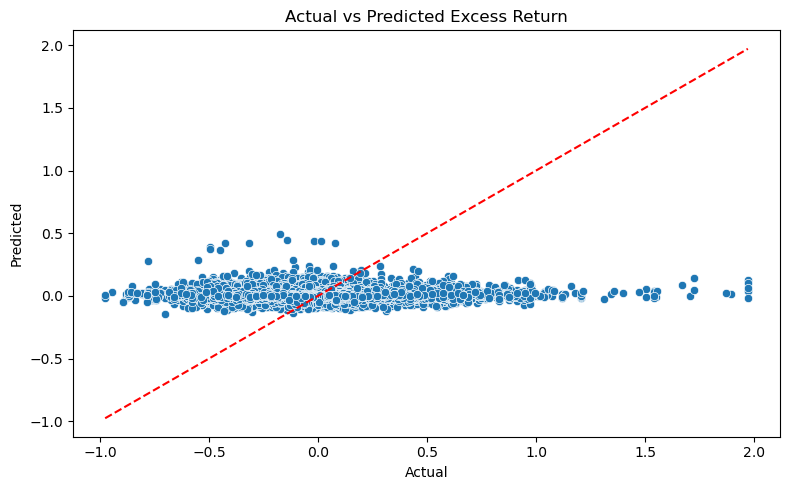

In [54]:
# ---- Fit Random Forest ---- #
RFmodel = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)
RFmodel.fit(X_train_enhanced, y_train)

# ---- Predict and Evaluate ---- #
y_pred = RFmodel.predict(X_test_enhanced)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# ---- Feature Importance ---- #
importances = RFmodel.feature_importances_
feature_names = X_train_enhanced.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ---- Plot Feature Importances ---- #
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from Enhanced Random Forest Regressor")
plt.tight_layout()
plt.show()

# ---- Residual Plot ---- #
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Excess Return")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# ---- Actual vs Predicted Plot ---- #
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Excess Return")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()


In [55]:
rf_results_interaction = {
    'model_name': 'Random Forest Regressor',
    'model_object': RFmodel,
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred, name='RF_Pred'),
    'rmse': rmse,
    'r2': r2,
    'feature_importance': feature_importance_df
}

import joblib
joblib.dump(rf_results_interaction, 'RandomForest_Model_Results_interaction.pkl')

print("✅ Random Forest model results saved to 'RandomForest_Model_Results_interaction.pkl'")


✅ Random Forest model results saved to 'RandomForest_Model_Results_interaction.pkl'


# Additional task: Running a random forest on only the 20 most significant predictors

In [57]:
# ---- Select Top 20 Features ---- #
top_20_features = feature_importance_df.head(20)['Feature'].tolist()

# Subset training and testing data to only top 20 features
X_train_top20 = X_train_enhanced[top_20_features]
X_test_top20 = X_test_enhanced[top_20_features]

# ---- Fit New Random Forest on Top 20 Features ---- #
RFmodel_top20 = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)
RFmodel_top20.fit(X_train_top20, y_train)

# ---- Predict and Evaluate ---- #
y_pred_top20 = RFmodel_top20.predict(X_test_top20)
mse_top20 = mean_squared_error(y_test, y_pred_top20)
rmse_top20 = np.sqrt(mse_top20)
r2_top20 = r2_score(y_test, y_pred_top20)

print(f"🔍 Top 20 Feature Model - Test RMSE: {rmse_top20:.4f}")
print(f"🔍 Top 20 Feature Model - Test R²: {r2_top20:.4f}")


🔍 Top 20 Feature Model - Test RMSE: 0.1723
🔍 Top 20 Feature Model - Test R²: -0.0172


# Hyperparameter tuning the original random forest

In [ ]:
# ---- Define parameter grid ---- #
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# ---- Initialize model ---- #
rf = RandomForestRegressor(random_state=123)

# ---- Randomized Search ---- #
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=123,
    n_jobs=-1,
    verbose=1
)

# ---- Fit on training data ---- #
random_search.fit(X_train, y_train)

# ---- Best model ---- #
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# ---- Predict and evaluate ---- #
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


# Fourth model: Histogram Gradient Boosting

In [29]:
hgb_model1 = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_iter=100,
    max_depth=3,
    min_samples_leaf=20,
    random_state=123
)

hgb_model1.fit(X_train, y_train)

# Predict
y_pred_model1 = hgb_model1.predict(X_test)

# Evaluate
rmse_model1 = np.sqrt(mean_squared_error(y_test, y_pred_model1))
r2_model1 = r2_score(y_test, y_pred_model1)

print(f"Model RMSE: {rmse_model1:.4f}")
print(f"Model - R²: {r2_model1:.4f}")


Model RMSE: 0.1718
Model - R²: -0.0123


       Feature  Importance
16         roe    0.002214
6       chcsho    0.001378
14        roic    0.001349
7          mve    0.001055
15     log_vol    0.000870
3      pchcapx    0.000457
11     log_lev    0.000374
1          sgr    0.000218
4      grltnoa    0.000207
5   pchsaleinv    0.000122
12      log_sp    0.000067
2        chinv    0.000034
9       log_ep   -0.000104
10      log_dy   -0.000158
8       log_bm   -0.000224
13      cashpr   -0.000401
0          agr   -0.000987


C:\Users\joseo\AppData\Local\Temp\ipykernel_7068\749043124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


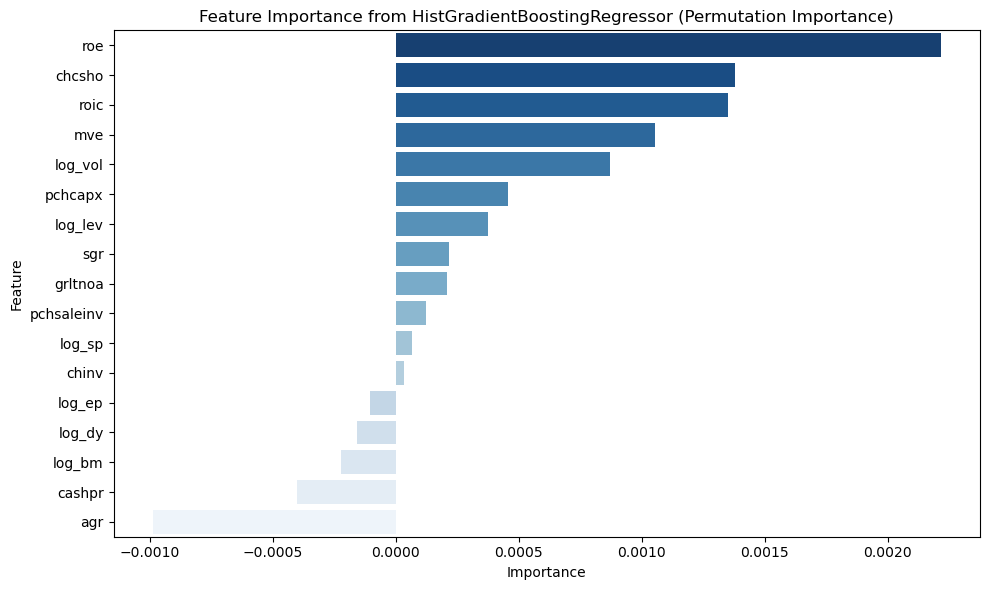

In [30]:
hgb.fit(X_train, y_train)  

result = permutation_importance(hgb_model1, X_test, y_test, n_repeats=10, random_state=123, n_jobs=-1)

feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from HistGradientBoostingRegressor (Permutation Importance)")
plt.tight_layout()
plt.show()



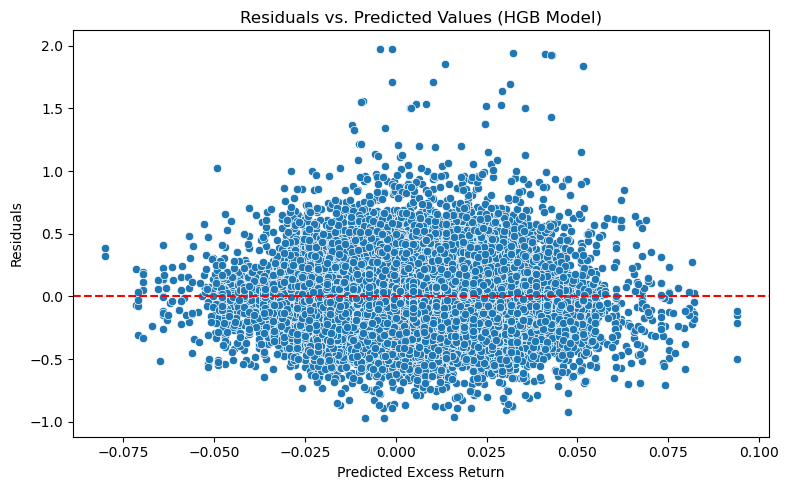

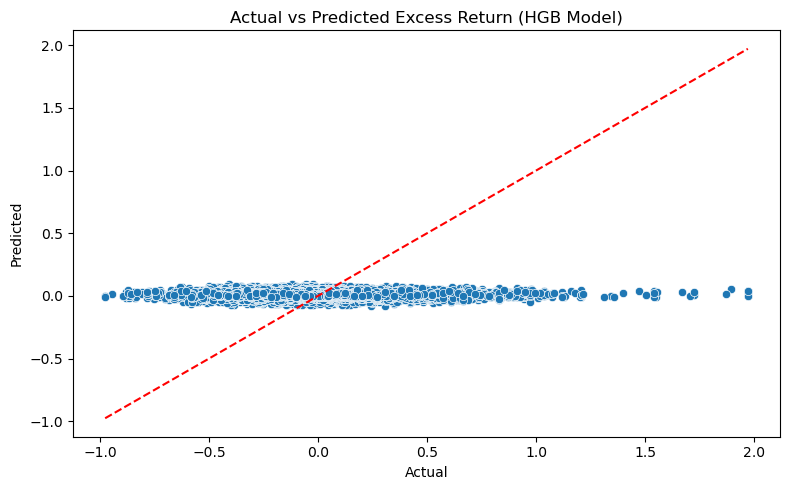

In [33]:
# Residuals vs Predicted plot for HGB model
residuals_hgb = y_test - y_pred_model1
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_model1, y=residuals_hgb)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values (HGB Model)")
plt.xlabel("Predicted Excess Return")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Actual vs Predicted plot for HGB model
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_model1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Excess Return (HGB Model)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()


In [35]:
hgb_model_results = {
    'model_name': 'HistGradientBoostingRegressor',
    'model_object': hgb_model1,
    'y_test': y_test.reset_index(drop=True),  # optional: reset index for clean merge later
    'y_pred': pd.Series(y_pred_model1, name='HGB_Pred'),  # for easier DataFrame joins later
    'rmse': rmse_model1,
    'r2': r2_model1,
    'feature_importance': feature_importance_df
}

joblib.dump(hgb_model_results, 'HGB_Model_Results.pkl')

print("✅ All model results saved to 'HGB_Model_Results.pkl'")


✅ All model results saved to 'HGB_Model_Results.pkl'


# Average of all four models

In [56]:
lasso = joblib.load('Lasso_Model_Results.pkl')
rf = joblib.load('RandomForest_Model_Results.pkl')
rf_interaction = joblib.load('RandomForest_Model_Results_interaction.pkl')
hgb = joblib.load('HGB_Model_Results.pkl')

# ---- Extract predictions ---- #
y_test = lasso['y_test']  # use one consistent y_test

# Combine predictions into a DataFrame
ensemble_preds_df = pd.DataFrame({
    'Lasso_Pred': lasso['y_pred'],
    'RF_Pred': rf['y_pred'],
    'RF_Interaction_Pred': rf_interaction['y_pred'],
    'HGB_Pred': hgb['y_pred']
})

# ---- Average predictions ---- #
ensemble_preds_df['Ensemble_Pred'] = ensemble_preds_df.mean(axis=1)

# ---- Evaluate ensemble ---- #
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds_df['Ensemble_Pred']))
ensemble_r2 = r2_score(y_test, ensemble_preds_df['Ensemble_Pred'])

print(f"✅ Ensemble RMSE: {ensemble_rmse:.4f}")
print(f"✅ Ensemble R²: {ensemble_r2:.4f}")

# ---- Save ensemble results ---- #
ensemble_results = {
    'model_name': 'Averaged Ensemble',
    'y_test': y_test,
    'y_pred': ensemble_preds_df['Ensemble_Pred'],
    'rmse': ensemble_rmse,
    'r2': ensemble_r2,
    'component_models': ['LassoCV', 'Random Forest', 'RF with interaction', 'HGB']
}

joblib.dump(ensemble_results, 'Averaged_Ensemble_Model_Results.pkl')
print("✅ Averaged ensemble model results saved to 'Averaged_Ensemble_Model_Results.pkl'")


✅ Ensemble RMSE: 0.1717
✅ Ensemble R²: -0.0110
✅ Averaged ensemble model results saved to 'Averaged_Ensemble_Model_Results.pkl'
